In [48]:
# IMPORT THƯ VIỆN 
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
import plotly.graph_objects as go
from plotly.offline import iplot



In [14]:
# Data

data = pd.read_csv(r"D:\IntroDS\final_project\Bai2\khao_sat_introds.csv", index_col='STT')
data.head(5)

,Tên,1,2,3,4,5,6,7,8,9,10
STT,,,,,,,,,,,
1,Trương Thành Thảo,-1,0,1,-1,1,0,-1,1,-1,1
2,Mai Anh Khoa,0,0,1,0,1,0,0,1,1,1
3,Trần Kế Tuấn Vương,0,0,0,-1,1,0,1,0,-1,1
4,Võ Khánh Dự,0,1,0,0,1,1,0,1,1,1
5,Trương Đức Tài,0,0,-1,0,1,0,1,0,0,0


### Vấn đề cần phân tích
+ Cơ sở vật chất của trường đáp ứng các tiêu chuẩn để đảm bảo chất lượng giảng dạy và học tập?
+ Đội ngũ giảng viên của trường có được đào tạo chuyên môn và nghiệp vụ đầy đủ để giảng dạy cho sinh viên? 
  
--> Từ đó suy ra chất lượng đào tạo của trường đang như thế nào ?


## 3. Checking data

In [15]:
# Kiểu dữ liệu
data.dtypes

Tên    object
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
dtype: object

In [16]:
# Kích thước dữ liệu
data.shape

(50, 11)

In [17]:
# Kiểm tra cột trùng lặp
duplicate = data[data.duplicated()]
print("number of duplicate rows: ", len(duplicate))

number of duplicate rows:  0


In [18]:
# check null
print(data.isnull().sum())

Tên    0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
dtype: int64


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tên     50 non-null     object
 1   1       50 non-null     int64 
 2   2       50 non-null     int64 
 3   3       50 non-null     int64 
 4   4       50 non-null     int64 
 5   5       50 non-null     int64 
 6   6       50 non-null     int64 
 7   7       50 non-null     int64 
 8   8       50 non-null     int64 
 9   9       50 non-null     int64 
 10  10      50 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.7+ KB


# - Thực hiện các thống kê căn bản


In [20]:
data.describe()

,1,2,3,4,5,6,7,8,9,10
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.140000,-0.060000,0.200000,-0.160000,0.800000,0.320000,0.100000,0.160000,0.080000,0.920000
std,0.452205,0.619743,0.670059,0.710274,0.404061,0.512696,0.677631,0.650275,0.723935,0.274048
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# - Tìm mối tương quan giữa các câu hỏi khảo sát và kết quả


,1,2,3,4,5
1,1.000000,0.042236,-0.040412,0.373611,0.178707
2,0.042236,1.000000,0.226067,-0.161341,0.114097
3,-0.040412,0.226067,1.000000,0.111490,0.075378
4,0.373611,-0.161341,0.111490,1.000000,0.170664
5,0.178707,0.114097,0.075378,0.170664,1.000000


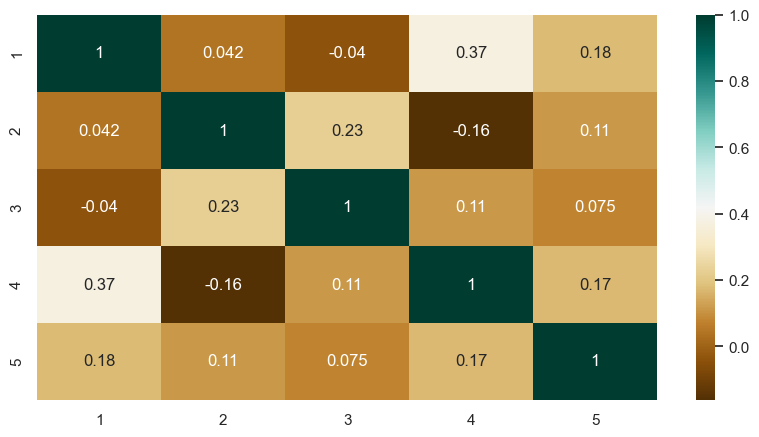

In [21]:
# Liên quan đến câu 1
plt.figure(figsize=(10,5))
c= data.iloc[:,1:6].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Nhận xét cau 1: 

    +   Mức độ tương quan của ở các trường khá thấp
    +   Mức độ tương quan khả quan để phân tích là (4, 5), (2, 5), (1, 5)

,6,7,8,9,10
6,1.000000,0.375951,0.455428,0.259529,0.331172
7,0.375951,1.000000,0.055577,0.191368,0.153855
8,0.455428,0.055577,1.000000,0.232366,0.073293
9,0.259529,0.191368,0.232366,1.000000,0.135785
10,0.331172,0.153855,0.073293,0.135785,1.000000


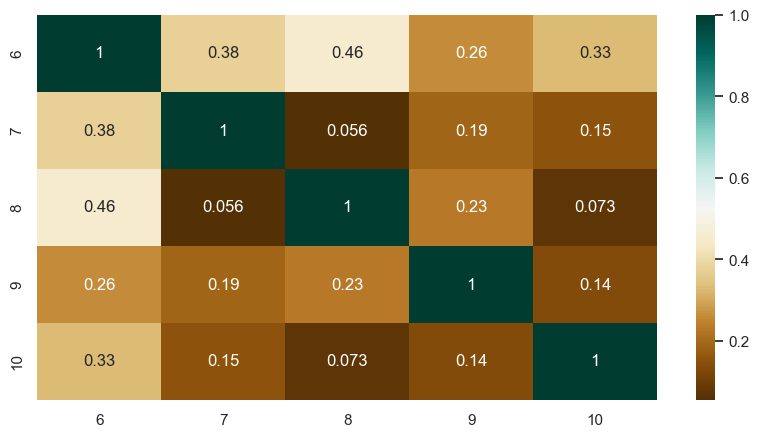

In [22]:
# Liên quan đến câu 2
plt.figure(figsize=(10,5))
c= data.iloc[:,6:].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Nhận xét cau 2: 

    +   Mức độ tương quan của ở các trường khá cao, cao nhất là (6, 10)
    +   Mức độ tương quan khả quan để phân tích là (6, 10), (7, 10), (8, 10), (9, 10)
    

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.042236,-0.040412,0.373611,0.178707,0.021126,0.113220,-0.061074,0.346612,0.072459
2,0.042236,1.000000,0.226067,-0.161341,0.114097,0.254347,0.257558,0.226868,0.147380,0.211485
3,-0.040412,0.226067,1.000000,0.111490,0.075378,0.225743,0.044947,0.440273,0.302917,0.200049
4,0.373611,-0.161341,0.111490,1.000000,0.170664,0.199511,-0.093284,0.233300,0.104781,0.037745
5,0.178707,0.114097,0.075378,0.170664,1.000000,-0.078811,0.074536,0.279616,0.265119,0.221163
6,0.021126,0.254347,0.225743,0.199511,-0.078811,1.000000,0.375951,0.455428,0.259529,0.331172
7,0.113220,0.257558,0.044947,-0.093284,0.074536,0.375951,1.000000,0.055577,0.191368,0.153855
8,-0.061074,0.226868,0.440273,0.233300,0.279616,0.455428,0.055577,1.000000,0.232366,0.073293
9,0.346612,0.147380,0.302917,0.104781,0.265119,0.259529,0.191368,0.232366,1.000000,0.135785
10,0.072459,0.211485,0.200049,0.037745,0.221163,0.331172,0.153855,0.073293,0.135785,1.000000


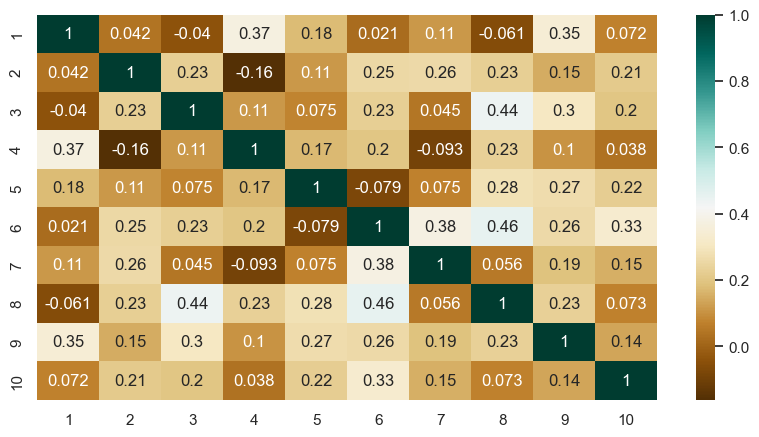

In [23]:
plt.figure(figsize=(10,5))
c= data.iloc[:,1:].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

+ Ở đây cho chúng ta thấy được mức độ tương quan giữa câu 8 và câu 10 là khá thấp khoảng 0.073

# Xác định các yếu tố quan trọng ảnh hưởng đến kết quả

In [24]:
data_main = data[['1', '2', '4', '5', '6','7', '8', '9', '10']]
data_main.head(5)

,1,2,4,5,6,7,8,9,10
STT,,,,,,,,,
1,-1,0,-1,1,0,-1,1,-1,1
2,0,0,0,1,0,0,1,1,1
3,0,0,-1,1,0,1,0,-1,1
4,0,1,0,1,1,0,1,1,1
5,0,0,0,1,0,1,0,0,0


# Trực quan hóa dữ liệu và kết quả

In [25]:
import plotly.express as px


+ Ở đây cho chúng ta thấy sự mấy cân bằng về dữ liệu ở giá trị 0

Phân tích cơ sở vật chất

In [26]:
px.bar(
    data['5'].value_counts().to_frame().reset_index(),
    x= '5',
    y= 'count',
    text_auto='.s',
    color='5',
    title='Thống kê sự hài lòng với cơ sở vật chất '
)

In [27]:
al_0_c1 = data[data['5'] == 0]
al_0_c1 = al_0_c1[['1', '2', '4']]

fig = []
for i in al_0_c1.columns:
    df = al_0_c1[i].value_counts().to_frame().reset_index()
    # print(df)
    fig.append(
        
        go.Bar(
            x = df[i],
            y = df['count'],
            name = i,
            # text_auto='.s'
        )
    )
layout = go.Layout(
    title='Phân tích trường hợp No cho câu hỏi cơ sở vật chất',
    xaxis=dict(title='Gía trị'),
    yaxis=dict(title='Số lượng'),
    barmode='group'
)

# Vẽ biểu đồ và hiển thị
fig = go.Figure(data=fig, layout=layout)
iplot(fig)

In [28]:
data['5'].value_counts()

5
1    40
0    10
Name: count, dtype: int64

In [29]:
al_1_c1 = data[data['5'] == 1]
al_1_c1 = al_1_c1[['1', '2', '4']]
len(al_1_c1)

40

In [30]:
al_1_c1 = data[data['5'] == 1]
al_1_c1 = al_1_c1[['1', '2', '4']]

fig = []
for i in al_1_c1.columns:
    df = al_1_c1[i].value_counts().to_frame().reset_index()
    # print(df)
    
    fig.append(
        
        go.Bar(
            x = df[i],
            y = df['count'],
            name = i,
            # text_auto='.s'
        )
    )
layout = go.Layout(
    title='Phân tích trường hợp YES cho câu hỏi cơ sở vật chất',
    xaxis=dict(title='Gía trị'),
    yaxis=dict(title='Số lượng'),
    barmode='group'
)

# Vẽ biểu đồ và hiển thị
fig = go.Figure(data=fig, layout=layout)
iplot(fig)

+ xu hướng chọn mức 0, 1 --> YES
+ xu hướng chọn mức -1 --> NO

Phân tích đội ngũ giảng viên

In [31]:

px.bar(
    data['10'].value_counts().to_frame().reset_index(),
    x= '10',
    y= 'count',
    text_auto='.s',
    color='10',
    title='Thống kê sự hài lòng với đội ngũ giảng viên '
)

In [32]:
al_0_c2 = data_main[data_main['10'] == 0]
al_0_c2 = al_0_c2[['6','7', '8', '9', '10']]

fig = []
for i in al_0_c2.columns:
    df = al_0_c2[i].value_counts().to_frame().reset_index()
    # print(df)
    
    fig.append(
        
        go.Bar(
            x = df[i],
            y = df['count'],
            name = i,
            # text_auto='.s'
        )
    )
layout = go.Layout(
    title='Phân tích trường hợp NO cho câu hỏi đội ngủ giảng viên',
    xaxis=dict(title='Gía trị'),
    yaxis=dict(title='Số lượng'),
    barmode='group'
)

# Vẽ biểu đồ và hiển thị
fig = go.Figure(data=fig, layout=layout)
iplot(fig)

In [33]:
al_1_c2 = data_main[data_main['10'] == 1]
al_1_c2 = al_1_c2[['6','7', '8', '9', '10']]

fig = []
for i in al_1_c2.columns:
    df = al_1_c2[i].value_counts().to_frame().reset_index()
    # print(df)
    
    fig.append(
        
        go.Bar(
            x = df[i],
            y = df['count'],
            name = i,
            # text_auto='.s'
        )
    )
layout = go.Layout(
    title='Phân tích trường hợp YES cho câu hỏi đội ngủ giảng viên',
    xaxis=dict(title='Gía trị'),
    yaxis=dict(title='Số lượng'),
    barmode='group'
)

# Vẽ biểu đồ và hiển thị
fig = go.Figure(data=fig, layout=layout)
iplot(fig)

+ có xu hướng chọn 0,1 sẽ đưa ra sự đồng tình

## Áp dụng model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [35]:
### Thông qua đây để đưa ra nhận xét về chất lượng đào tạo của trường có tốt hay không thì chúng em 
# nhận xét rằng để là một cơ sở đào tạo tốt thì phải có sự đồng tình của cả 2 câu hỏi trên


In [36]:
def Linear_Regression(train, name_y=None):
    
    # train_t = train[features]
    X = train.iloc[:, train.columns != name_y]
    y = train[name_y]
    x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=42, shuffle=True)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
   
    y_hat = LR.predict(x_val)
    RMSE_train = np.sqrt(mean_squared_error(y_val, y_hat, squared=False))

    print(f"RMSE OF X TRAIN: {RMSE_train}")


In [37]:
dc = {0:'NO', 1:'YES'}
data_main['5'] = data_main['5'].apply(lambda x: dc[x])
data_main['10'] = data_main['10'].apply(lambda x: dc[x])

C:\Users\nguye\AppData\Local\Temp\ipykernel_27452\3851739829.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_27452\3851739829.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
le = LabelEncoder()
def decision_tree(x_train, y_train, x_val, y_val):
    
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_train)
    y_val = le.fit_transform(y_val)
    # Huấn luyện mô hình Decision Tree Regressor
    model = DecisionTreeRegressor().fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    rmse = mean_squared_error(y_val, y_val_pred)
    print("RMSE: %f" % (rmse))

    # Mean Squared Error
    print("Mean squared error: %.2f"
        % mean_squared_error(y_val, y_val_pred))
    return model


In [51]:
name_y1 = '5'
datac1 = data_main[['1', '2', '4', '5']]
X1= datac1.iloc[:, datac1.columns != name_y1]
y1 = datac1[name_y1]
x_train1, x_val1, y_train1, y_val1 = train_test_split(X1, y1, train_size=0.9, test_size=0.1, random_state=42, shuffle=True)

In [52]:
name_y2 = '10'
datac2 = data_main[['6', '7', '10']]
X2= datac2.iloc[:, datac2.columns != name_y2]
y2 = datac2[name_y2]
x_train2, x_val2, y_train2, y_val2 = train_test_split(X2, y2, train_size=0.9, test_size=0.1, random_state=42, shuffle=True)

In [53]:
predict1 = decision_tree(x_train1, y_train1, x_val1, y_val1)
# predict2 = decision_tree(x_train2, y_train2)

RMSE: 0.344000
Mean squared error: 0.34


In [54]:
predict2 = decision_tree(x_train2, y_train2, x_val2, y_val2)

RMSE: 0.861609
Mean squared error: 0.86


In [55]:
# Sau khi thử nghiệm nhiều thì em thấy rằng bỏ bớt trường sẽ thấy rsme giảm
# có vẽ dữ liệu đang bị thiếu

# Kết quả đưa ra chất lượng đào tạo của trường đang như thế nào ?

In [63]:
y_pred1 = predict1.predict(x_val1).round().astype(int)
# y_pred2 = predict1.predict(x_val2)

In [64]:
y_pred2 = predict2.predict(x_val2).round().astype(int)

In [65]:
ans  =y_pred1 & y_pred2

In [66]:
for i in ans:
    if i == 1:
        print('Chất lượng đào tạo tốt')
    else:
        print('Chất lượng đào tạo không tốt')

Chất lượng đào tạo tốt
Chất lượng đào tạo không tốt
Chất lượng đào tạo không tốt
Chất lượng đào tạo tốt
Chất lượng đào tạo tốt


In [4]:

# Chất lượng đào tạo tốt
# Chất lượng đào tạo không tốt
# Chất lượng đào tạo không tốt
# Chất lượng đào tạo tốt
# Chất lượng đào tạo tốt